# 

In [1]:
from Color_functions import *
from skimage import io
from skimage.color import rgb2lab
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
plt.gray()

<Figure size 640x480 with 0 Axes>

In [24]:
rgb_img = io.imread("imagenes/images_prepped_train/img(50).jpg").astype(np.float32)  /255
lab_img = rgb2lab(rgb_img)

In [4]:
prob_la = np.load("probabilidades.npy")
prob_lb = np.load("probabilidades.npy")
prob_ab = np.load("probabilidades.npy")

In [15]:
prob_la[:,23]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

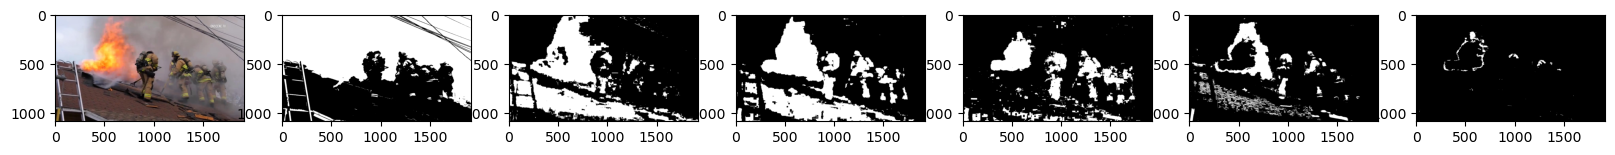

In [25]:
fig, axes = plt.subplots(1,7, figsize=(20, 10))

R1, R2, R3, R4, R5 = mascaras(lab_img, prob_la, prob_lb, prob_ab, 0.000016)

axes[0].imshow(rgb_img)
axes[1].imshow(R1)
axes[2].imshow(R2)
axes[3].imshow(R3)
axes[4].imshow(R4)
axes[5].imshow(R5)
axes[6].imshow(R1 & R2 & R3 & R4 & R5)

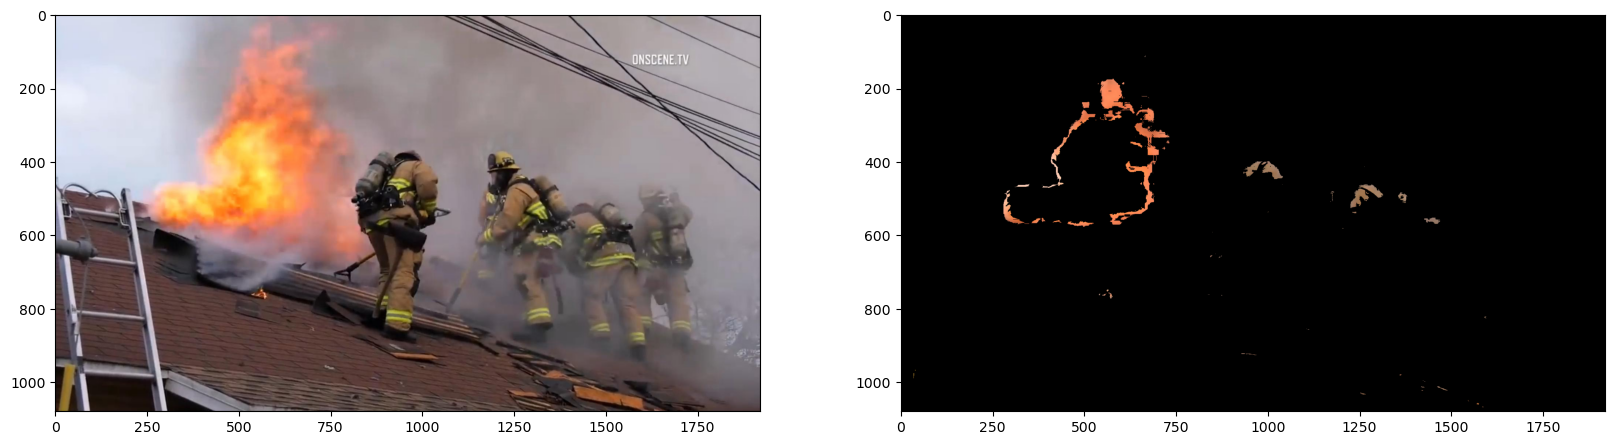

In [26]:
fig, axes = plt.subplots(1,2, figsize=(20, 10))

axes[0].imshow(rgb_img)
axes[1].imshow(rgb_img * (R1 & R2 & R3 & R4 & R5)[...,None])